"""<br>
    @Author: Deven Gupta<br>
    @Date: 28-09-2024<br>
    @Last Modified by: Deven Gupta<br>
    @Last Modified time: 28-09-2024<br>
    @Title : Python Program for Simple linear Regression task 1<br>
<br>
"""

# Importing Libraies

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Loading dataset

In [2]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
# Display the rows of the dataset
display(train_data)
display(test_data)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


# dataset statistics (Info)

In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [6]:
train_data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [7]:
test_data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


# Checking Outliers using Boxplot and removing using IOR Method

<Axes: >

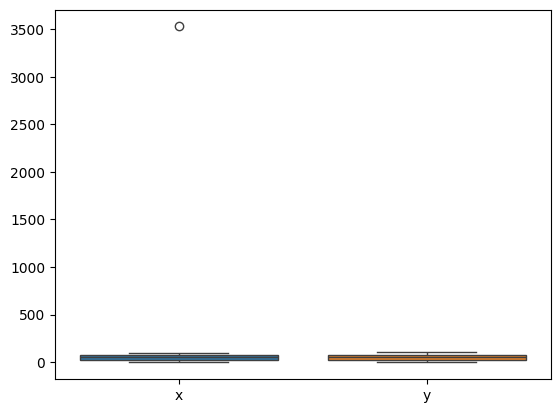

In [41]:
sns.boxplot(data=train_data)

In [11]:
Q1 = train_data['x'].quantile(0.25)
Q3 = train_data['x'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_train_data = train_data[(train_data['x'] > lower_bound) & (train_data['x'] < upper_bound)]

<Axes: >

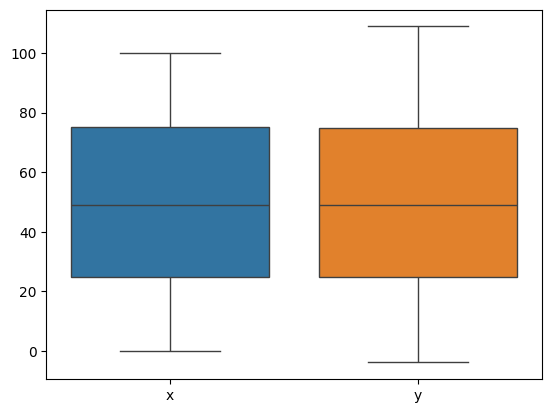

In [13]:
sns.boxplot(data=clean_train_data)

<Axes: >

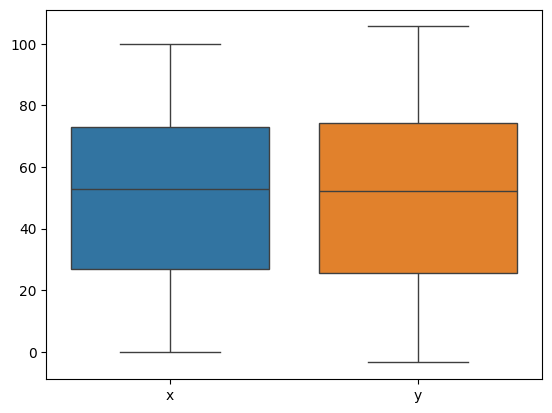

In [14]:
sns.boxplot(data=test_data)

In [16]:
clean_train_data.isnull().sum()

x    0
y    0
dtype: int64

In [17]:
test_data.isnull().sum()

x    0
y    0
dtype: int64

# Splitting Data

In [18]:
# Define features and target variable
X_train = clean_train_data[['x']]
y_train = clean_train_data['y']

X_test = test_data[['x']]
y_test = test_data['y']


# Model Creation and Fitting

In [20]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

# Checking model Prediction

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluating Performance of model

In [22]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 9.432922192039317
R-squared: 0.9888014444327563


# Visualization

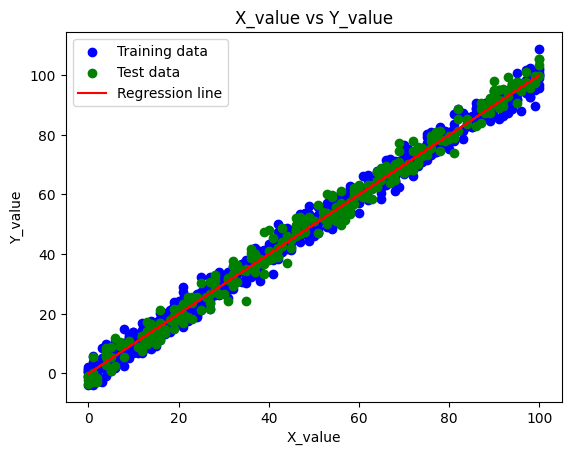

In [24]:
# Plotting the results
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.xlabel('X_value')
plt.ylabel('Y_value')
plt.title('X_value vs Y_value')
plt.legend()
plt.show()
